In [2]:
ls ../output | head

pk_m1.0e-05_sig1.0e-25_np0_background.dat
pk_m1.0e-05_sig1.0e-25_np0_parameters.ini
pk_m1.0e-05_sig1.0e-25_np0_pk.dat
pk_m1.0e-05_sig1.0e-25_np0_tk.dat
pk_m1.0e-05_sig1.0e-25_np0_unused_parameters
pk_m1.0e-05_sig1.0e-25_np2_background.dat
pk_m1.0e-05_sig1.0e-25_np2_parameters.ini
pk_m1.0e-05_sig1.0e-25_np2_pk.dat
pk_m1.0e-05_sig1.0e-25_np2_tk.dat
pk_m1.0e-05_sig1.0e-25_np2_unused_parameters


In [10]:
import re

def parse_filename(s):
    """Takes filename, returns dictionary of parameters
    """
    m = re.search(r'pk_m(.+)_sig(.+)_np(\d)_tk.dat', s)
    if m:
        return {'mass': float(m.group(1)),
                'sigma': float(m.group(2)),
                'np': int(m.group(3))
               }

In [11]:
parse_filename('pk_m1.0e-05_sig1.0e-25_np0_tk.dat')

{'mass': 1e-05, 'sigma': 1e-25, 'np': 0}

In [12]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [76]:
import glob

files = glob.glob('../output/*_tk.dat')
columns = ['k','d_g', 'd_b', 'd_cdm', 'd_dmeff','d_ur', 'd_tot', 'phi', 'psi']
csv_kwargs = dict(sep=r'\s+', skiprows=9, names=columns)
dfs = []
for f in files:
    df = pd.read_csv(f, **csv_kwargs)
    params = parse_filename(f)
    if not params:
        print(f)
    else:
        df = df.assign(**params)
    dfs.append(df)
df = pd.concat(dfs)

In [62]:
df.head()

,k,d_g,d_b,d_cdm,d_dmeff,d_ur,d_tot,phi,psi,mass,sigma,np
0,0.000010,-0.000016,-0.000012,-0.000012,-0.000012,-0.000016,-0.000012,0.612177,0.596846,0.000036,3.600000e-30,2
1,0.000012,-0.000020,-0.000015,-0.000015,-0.000015,-0.000020,-0.000015,0.612177,0.596846,0.000036,3.600000e-30,2
2,0.000013,-0.000025,-0.000019,-0.000019,-0.000019,-0.000025,-0.000019,0.612177,0.596846,0.000036,3.600000e-30,2
3,0.000015,-0.000032,-0.000024,-0.000024,-0.000024,-0.000032,-0.000024,0.612177,0.596846,0.000036,3.600000e-30,2
4,0.000017,-0.000040,-0.000030,-0.000030,-0.000030,-0.000040,-0.000030,0.612177,0.596846,0.000036,3.600000e-30,2


In [63]:
df.query('np==2').mass.unique()

array([3.6e-05, 2.2e-02, 2.8e-01, 4.6e-04, 1.7e-03, 6.0e-03, 1.3e-04,
       1.0e+00, 7.7e-02, 1.0e-05])

In [69]:
df.query('np==2').sigma.unique()

array([3.6e-30, 1.0e-25, 1.7e-28, 6.0e-28, 1.3e-29, 2.8e-26, 7.7e-27,
       4.6e-29, 2.2e-27, 1.0e-30])

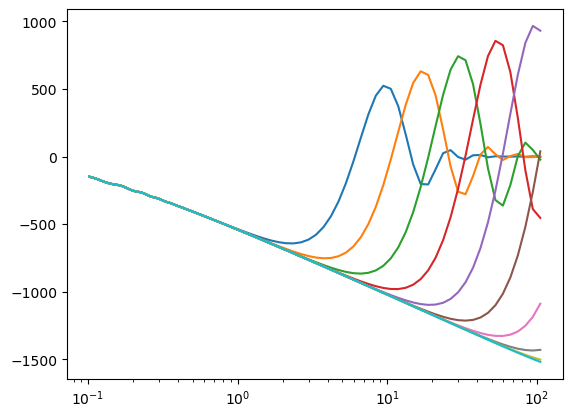

In [89]:
import matplotlib.pyplot as plt
import numpy as np

subdf = df.query('k>0.1 and np==2 and sigma==1.0e-25')
for mass in np.sort(subdf.mass.unique()):
    subsubdf = subdf.query(f'mass == {mass}')
    plt.semilogx(subsubdf['k'], subsubdf['d_tot'], label=f'mass = {mass}')
# plt.yscale('symlog')

In [74]:
df.to_csv('all_tk.csv')

In [57]:
df[(0.000036, 3.6e-30, 2)]

KeyError: (3.6e-05, 3.6e-30, 2)

In [41]:
len(df)

57600

In [42]:
df

,k,d_g,d_b,d_cdm,d_dmeff,d_ur,d_tot,phi,psi,mass,sigma,np
0,0.000010,-1.589235e-05,-0.000012,-0.000012,-0.000012,-1.589234e-05,-0.000012,6.121773e-01,5.968462e-01,0.000036,3.600000e-30,2
1,0.000012,-2.000726e-05,-0.000015,-0.000015,-0.000015,-2.000725e-05,-0.000015,6.121772e-01,5.968461e-01,0.000036,3.600000e-30,2
2,0.000013,-2.518761e-05,-0.000019,-0.000019,-0.000019,-2.518760e-05,-0.000019,6.121771e-01,5.968461e-01,0.000036,3.600000e-30,2
3,0.000015,-3.170927e-05,-0.000024,-0.000024,-0.000024,-3.170924e-05,-0.000024,6.121769e-01,5.968460e-01,0.000036,3.600000e-30,2
4,0.000017,-3.991952e-05,-0.000030,-0.000030,-0.000030,-3.991947e-05,-0.000030,6.121768e-01,5.968459e-01,0.000036,3.600000e-30,2
...,...,...,...,...,...,...,...,...,...,...,...,...
187,66.734543,-2.203850e-06,-1088.469884,-1538.677937,-1538.392730,-2.200203e-06,-1425.862097,1.704524e-06,1.704524e-06,0.022000,7.700000e-27,2
188,74.877389,-1.777120e-06,-1103.226312,-1562.989806,-1562.586483,-1.774187e-06,-1447.925741,1.374902e-06,1.374902e-06,0.022000,7.700000e-27,2
189,84.013812,-1.431362e-06,-1116.431498,-1586.125811,-1585.554339,-1.429007e-06,-1468.748800,1.107830e-06,1.107830e-06,0.022000,7.700000e-27,2
190,94.265048,-1.151167e-06,-1127.537605,-1607.577824,-1606.767007,-1.149281e-06,-1487.814246,8.914033e-07,8.914033e-07,0.022000,7.700000e-27,2


In [35]:
len(dfs)

301

In [26]:
df.head()

,k,d_g,d_b,d_cdm,d_dmeff,d_ur,d_tot,phi,psi
0,0.000010,-0.000016,-0.000012,-0.000012,-0.000012,-0.000016,-0.000012,0.612177,0.596846
1,0.000012,-0.000020,-0.000015,-0.000015,-0.000015,-0.000020,-0.000015,0.612177,0.596846
2,0.000013,-0.000025,-0.000019,-0.000019,-0.000019,-0.000025,-0.000019,0.612177,0.596846
3,0.000015,-0.000032,-0.000024,-0.000024,-0.000024,-0.000032,-0.000024,0.612177,0.596846
4,0.000017,-0.000040,-0.000030,-0.000030,-0.000030,-0.000040,-0.000030,0.612177,0.596846


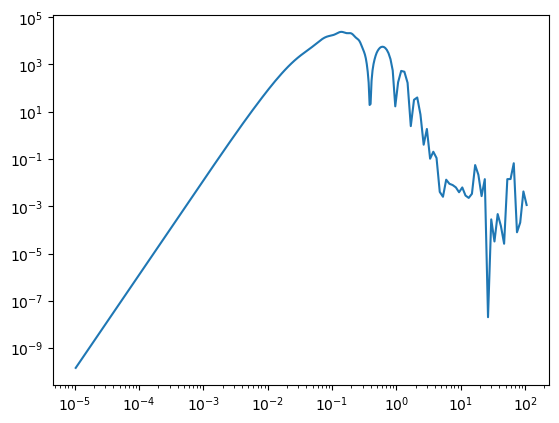

In [32]:
import matplotlib.pyplot as plt

plt.loglog(df['k'], df['d_tot']**2)

In [ ]:
import glob

dfs = df